# Project 3, Part 5 - Linear Regression Models

Kris Barbier

## Imports


In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#Fix random seed for reproducibility
np.random.seed(321)

#Set global scikit-learn configuration 
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Set max columns for dataframes
pd.set_option('display.max_columns',100)

## Load and Inspect Data

In [2]:
#Load in combined data set
FOLDER = 'Data/'
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,1.611,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.740,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.951,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,19.202,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2298.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.912,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.642,53.0,R


In [3]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16898 entries, 0 to 16897
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                16898 non-null  object 
 1   adult                  16898 non-null  float64
 2   backdrop_path          9424 non-null   object 
 3   belongs_to_collection  1297 non-null   object 
 4   budget                 16898 non-null  float64
 5   genres                 16898 non-null  object 
 6   homepage               2763 non-null   object 
 7   id                     16898 non-null  float64
 8   original_language      16898 non-null  object 
 9   original_title         16898 non-null  object 
 10  overview               16513 non-null  object 
 11  popularity             16898 non-null  float64
 12  poster_path            14960 non-null  object 
 13  production_companies   16898 non-null  object 
 14  production_countries   16898 non-null  object 
 15  re

## Clean Data 

- Tasks:
    - Belongs to Collection: convert to boolean
    - Genres: get just the name and manually OHE
    - Cleaning Categories in Certification
    - Converting release date to year, month, and day.

In [4]:
#Drop unnecessary columns
drop_cols = ['backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies','spoken_languages',
             'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R


In [5]:
#Change values in belongs to collection column to true/false
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    15601
True      1297
Name: belongs_to_collection, dtype: int64

In [6]:
#Function to get list of genres from each movie
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
#Test function
get_genre_name(df.loc[3,'genres'])

['Drama', 'Romance']

In [8]:
#Use function to explode genres to new columns
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.50,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.45,10.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.00,1.0,NaN,Drama


In [9]:
#Save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [10]:
#Onehot encode genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,"[Comedy, Music, Romance]",True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,[Science Fiction],False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,"[Drama, Action, Crime]",False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,"[Drama, Romance]",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,[Drama],False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Drop genres and genres_list 
df = df.drop(columns = ['genres', 'genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Preview certification column values
df['certification'].value_counts(dropna = False)

NaN                                11575
R                                   2585
PG-13                               1260
NR                                   768
PG                                   524
G                                    135
NC-17                                 47
Unrated                                1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
Name: certification, dtype: int64

In [13]:
#Remove extra space
df['certification'] = df['certification'].str.strip()

In [14]:
#Clean up extra ratings
cert_dict = {'Unrated': 'NR',
            'UR': 'NR',
            'Not Rated': 'NR',
            'ScreamFest Horror Film Festival': 'NR'}

#Replace values
df['certification'] = df['certification'].replace(cert_dict)
df['certification'].value_counts(dropna = False)

NaN      11575
R         2585
PG-13     1260
NR         772
PG         524
G          135
NC-17       47
Name: certification, dtype: int64

In [15]:
#Split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,1.611,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.740,2000-11-15,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.951,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,19.202,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.912,2000-09-02,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [16]:
#Drop original release date column
df = df.drop(columns = 'release_date')

In [17]:
#Preview final df
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,1.611,0.0,86.0,The Fantasticks,5.500,22.0,NaN,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.740,0.0,100.0,For the Cause,5.450,10.0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.951,0.0,152.0,Gang,4.000,1.0,NaN,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,False,150000.0,19.202,14204632.0,99.0,In the Mood for Love,8.100,2298.0,PG,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.912,0.0,99.0,Chinese Coffee,6.642,53.0,R,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,9.0,2.0


## Pre-processing for Machine Learning

In [18]:
#Define X and y
drop_for_model = ['title','imdb_id']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
14013,0.0,False,0.0,0.655,107.0,0.000,0.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2008.0,4.0,21.0
69,0.0,False,0.0,3.238,89.0,4.000,10.0,PG-13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000.0,3.0,24.0
11203,0.0,False,0.0,1.015,115.0,6.600,16.0,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2007.0,2.0,24.0
10388,0.0,False,12000000.0,10.577,97.0,6.666,567.0,R,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2007.0,5.0,1.0
6864,0.0,False,0.0,1.091,0.0,0.000,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2005.0,9.0,9.0


In [19]:
#Make cat selector and use it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [20]:
#Save manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [21]:
#Make num selector and use it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [22]:
#Change OHE columns to numeric
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [23]:
#Make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=False))

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [24]:
#Fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_ave...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [25]:
#Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [26]:
#Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)


#Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
print(len(final_features))

#Checking shape matches len final features
print(preprocessor.transform(X_train).shape)

36
(12673, 36)


In [27]:
#Make X_train_tf 
X_train_tf = pd.DataFrame(preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
14013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655,107.0,0.000,0.0,2008.0,4.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238,89.0,4.000,10.0,2000.0,3.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11203,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.015,115.0,6.600,16.0,2007.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10388,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12000000.0,10.577,97.0,6.666,567.0,2007.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6864,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.091,0.0,0.000,0.0,2005.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Make X_test_tf 
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
4209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.000,0.0,2003.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.772,0.0,4.500,6.0,2006.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,108.0,0.000,0.0,2006.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.991,77.0,6.752,117.0,2003.0,6.0,13.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.334,105.0,6.388,41.0,2009.0,9.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Import statsmodels 
import statsmodels.api as sm

In [30]:
#Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
14013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.655,107.0,0.0,0.0,2008.0,4.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238,89.0,4.0,10.0,2000.0,3.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
4209,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,0.0,0.0,0.0,2003.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9949,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.772,0.0,4.5,6.0,2006.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Model 1:

- The first linear regression model finished with an R2 on the testing data of 0.739.

In [31]:
#Instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

#Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1591.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:50:05   Log-Likelihood:            -2.3382e+05
No. Observations:               12673   AIC:                         4.677e+05
Df Residuals:                   12637   BIC:                         4.680e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.687e+07   1.32e+08     -0.203      0.839   -2.86e+08    2.32e+08
certification_G       -8.157e+05    1.9e+07     -0.043      0.966   -3.81e+07    3.65e+07
certification_MISSING -2.043e+06   1.89e+07     -0.108      0.914   -3.91e+07     3.5e+07
certification_NC-17   -4.251e+06   1.93e+07     -0.220      0.826   -4.21e+07    3.36e+07
certification_NR      -3.739e+06    1.9e+07     -0.197      0.844   -4.09e+07    3.35e+07
certification_PG      -2.093e+06    1.9e+07     -0.110      0.912   -3.93e+07    3.51e+07
certification_PG-13   -3.761e+06   1.89e+07     -0.199      0.842   -4.08e+07    3.33e+07
certification_R       -1.016e+07   1.89e+07     -0.538      0.591   -4.72e+07    2.69e+07
adult                  5.824e+05   5.86e+06      0.099      0.921   -1.09e+07    1.21e+07
budget                    1.2869      0.019     69.171      0.000       1.250       1.323
popularity             2.305e+04   5.02e+04      0.459      0.646   -7.54e+04    1.22e+05
runtime                6045.3664   8394.526      0.720      0.471   -1.04e+04    2.25e+04
vote_average          -5.467e+05   1.04e+05     -5.245      0.000   -7.51e+05   -3.42e+05
vote_count             2.577e+04    286.629     89.911      0.000    2.52e+04    2.63e+04
year                   1.538e+04   7.54e+04      0.204      0.838   -1.32e+05    1.63e+05
month                 -1.416e+05   6.29e+04     -2.249      0.025   -2.65e+05   -1.82e+04
day                    2.104e+04   2.44e+04      0.863      0.388   -2.68e+04    6.88e+04
belongs_to_collection  1.175e+07   9.04e+05     12.988      0.000    9.97e+06    1.35e+07
Genre_Comedy          -1.919e+05   5.41e+05     -0.355      0.723   -1.25e+06    8.69e+05
Genre_Music            1.943e+05   1.62e+06      0.120      0.905   -2.99e+06    3.37e+06
Genre_Romance          1.032e+06   6.41e+05      1.609      0.108   -2.25e+05    2.29e+06
Genre_Science Fiction -7.991e+06   1.07e+06     -7.462      0.000   -1.01e+07   -5.89e+06
Genre_Drama           -5.425e+05   5.23e+05     -1.037      0.300   -1.57e+06    4.83e+05
Genre_Action          -5.577e+05   7.33e+05     -0.760      0.447      -2e+06     8.8e+05
Genre_Crime           -5.154e+06    8.5e+05     -6.063      0.000   -6.82e+06   -3.49e+06
Genre_Adventure        4.702e+06   1.08e+06      4.347      0.000    2.58e+06    6.82e+06
Genre_Animation       -1.003e+06   1.44e+06     -0.695      0.487   -3.83e+06    1.83e+06
Genre_Fantasy         -6.495e+05   1.14e+06     -0.568      0.570   -2.89e+06    1.59e+06
Genre_Horror           -1.46e+05   7.32e+05     -0.200      0.842   -1.58e+06    1.29e+06
Genre_Thriller        -8.258e+05   6.61e+05     -1.249      0.212   -2.12e+06     4.7e+05
Genre_History         -4.603e+06   1.66e+06     -2.778      0.005   -7.85e+06   -1.36e+06
Genre_Family          -

In [32]:
#Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

#Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.815
Testing R^2: 0.739


### Checking Assumptions

In [34]:
# Function to plot qq plot and residual plot
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()

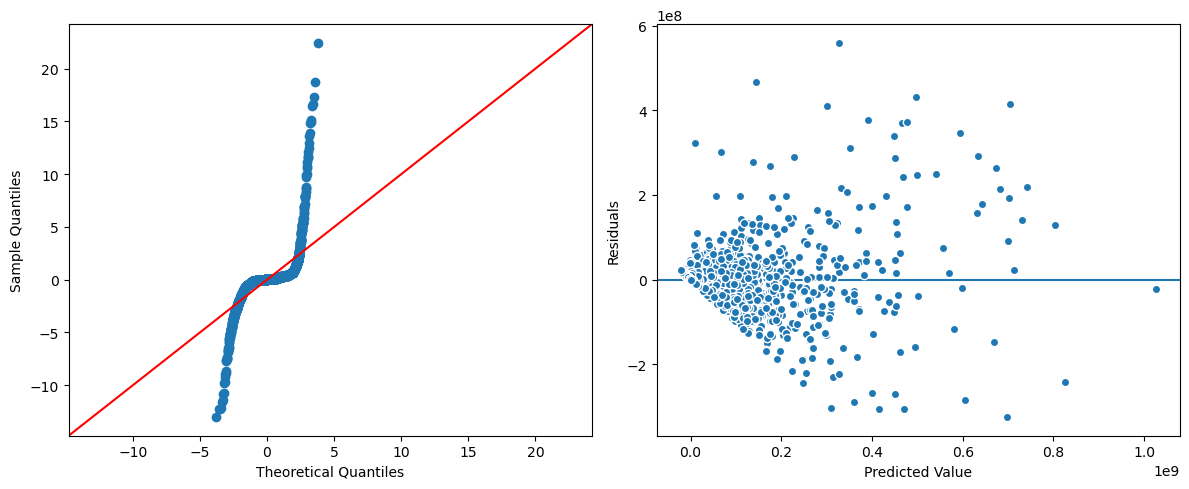

In [35]:
#Test function
evaluate_ols(result,X_train_df, y_train)